In [65]:
import matplotlib.pyplot as plt 
import numpy as np
import random

In [66]:
class Circle:
    '''
    Class for circles with the properties x and y for centre coordinate 
    and radius
    '''
    def __init__(self,x,y,rad):
        self.x = x
        self.y = y
        self.rad = rad
    
    def __str__(self):
        return f"x: {self.x} y: {self.y} radius: {self.rad}"

In [67]:
def centre_2_centre(circle_1,circle_2):
    '''
    Returns the distance between the centres of two circle objects
    '''
    x_1 = circle_1.x
    x_2 = circle_2.x
    y_1 = circle_1.y
    y_2 = circle_2.y
    dist = ((x_1 - x_2)**2 + (y_1 - y_2)**2)**0.5
    return dist

In [68]:
def clash(circle_1,circle_2):
    '''
    Checks if two inner circle objects clash
    Returns True if there's no clash
    '''
    dist = centre_2_centre(circle_1, circle_2)
    min_dist = circle_1.rad + circle_2.rad
    return dist >= min_dist

In [69]:
def out_duct(cable, duct):
    '''
    Checks if cable is in the duct
    Arguments: duct - as Circle object, cable as Circle object
    Returns: True if cable is inside the duct
    '''
    dist = centre_2_centre(duct,cable) # distance from centre of duct to centre of cable
    return dist + cable.rad <= duct.rad 

In [70]:
def over_half(cable, duct):
    '''
    Checks if duct is more than half full after placing new cable
    Arguments: duct - as Circle object, cable as Circle object
    Returns: True if duct is less than half full after new cable, 
    '''
    return cable.y + cable.rad <= duct.y

In [71]:
def cable_filter(function,new_cable_list,placed_cable_list):
    '''
    Function to filter out inadmissible cable locations.
    Arguments: function can be any of the functions to test 
    for inadmissible locations, the new cable list contains 
    the locations to be tested. Placed cables are cable locations
    previously selected
    Returns: Truncated new cable list containing only admissible
    locations.
    '''
    # Making a new list of lists using the True/False test to 
    # compare all the items in the the first list with all
    # the items in the second list
    bool_new = []
    n = 0
    for i in new_cable_list:
        bool_new.append([])
        for j in placed_cable_list:
            bool_new[n].append(function(i,j))
        n += 1
    
    # Use the all() function to select only the lists where
    # all the values are True
    n = 0
    boolall = []
    for i in bool_new:
        boolall.append(all(bool_new[n]))
        n += 1
    
    # Shorten new cable list 
    onlytrue = []
    n = 0
    for i in boolall:
        if i == True:
            onlytrue.append(new_cable_list[n])
        n += 1
    
    return onlytrue

In [72]:
def cables_touch(cable_1,cable_2,new_cable):
    '''
    Checks if new cable can touch two existing cables
    Arguments: cable_1 and 2 are existing cables as circle objects,
    new_cable is the radius of the new cable
    Return: True if new cable can touch the two existing cables at 
    the same time
    '''
    dist = centre_2_centre(cable_1,cable_2)
    return dist <= cable_1.rad + cable_2.rad + 2*new_cable

In [73]:
def touch_duct(duct,cable,new_cable):
    '''
    Checks if new cable can touch an existing cable and the duct
    Arguments: duct and cable as circle objects, new_cable is the 
    radius of the new cable
    Return: True if the new cable can touch the existing cable and 
    the duct at the same time
    '''
    dist = centre_2_centre(duct,cable)
    return duct.rad <= dist + cable.rad + 2*new_cable

In [74]:
def lowest_cable(cable_list):
    '''
    Returns the lowest cable in a list of cables
    Arguments: list of cables as Circle objects
    Returns: lowest cable in list 
    '''
    if cable_list == []:
        return cable_list
    y_values = [] # Empty list to populate with y values from Circle objects
    n = 0
    for i in cable_list:
        y_values.append(cable_list[n].y) # Creates list of all y values
        n += 1
    index_lowest = y_values.index(min(y_values)) # Gives index of lowest y value
    return [cable_list[index_lowest]]

In [75]:
# Test lowest cable
c_1 = Circle(x=0,y=0,rad=75)
c_2 = Circle(x=0,y=1,rad=75)
c_3 = Circle(x=0,y=5,rad=75)
c_4 = Circle(x=0,y=5,rad=75)
c_5 = Circle(x=0,y=-6,rad=75)
cables = [c_1,c_2,c_3,c_4,c_5]
#cables = []
print(lowest_cable(cables)[0])

x: 0 y: -6 radius: 75


In [76]:
c_1 = Circle(x=0,y=0,rad=75)

In [77]:
def plot_duct(circle):
    '''
    Argument: Circle object
    Return: Plot of a circle with a line through the middle
    '''
    centre_x = circle.x
    centre_y = circle.y
    radius = circle.rad
    # Create a numpy array for the x values
    x_values = np.linspace(centre_x - radius , centre_x + radius, num=1000)
    # Create numpy array for y values
    y_values = [] # start with empty list
    # Create values above the centre of the circle
    for i in x_values:
        y_values.append((radius**2 - (i - centre_x)**2)**0.5 + centre_y)
    # create y values below the centre of the circle
    for i in x_values:
        y_values.append(-(radius**2 - (i - centre_x)**2)**0.5 + centre_y)
    # Convert the list into a numpy array
    y_values = np.asarray(y_values)
    # Double up the x values because they each appear twice
    x_values = np.append(x_values, x_values)
    plt.axis('equal') # makes the x and y axis equal in scale
    return plt.plot(x_values,y_values)

In [78]:
def plot_cable(circle):
    '''
    Argument: Circle object
    Return: Plot of a circle
    '''
    centre_x = circle.x
    centre_y = circle.y
    radius = circle.rad
    # Create a numpy array for the x values at the top of the circle
    x_values_top = np.linspace(centre_x - radius , centre_x + radius, num=1000)
    # Create a numpy array for the x values at the bottom of the circle
    x_values_bottom = np.flipud(x_values_top)
    # Create numpy array for y values
    y_values = [] # start with empty list
    # Create values above the centre of the circle
    for i in x_values_top:
        y_values.append((radius**2 - (i - centre_x)**2)**0.5 + centre_y)
    # create y values below the centre of the circle
    for i in x_values_bottom:
        y_values.append(-(radius**2 - (i - centre_x)**2)**0.5 + centre_y)
    # Convert the list into a numpy array
    y_values = np.asarray(y_values)
    # Joint the x values from the top and bottom of the circle together
    x_values = np.append(x_values_top, x_values_bottom)
    plt.axis('equal') # makes the x and y axis equal in scale
    return plt.plot(x_values,y_values)

In [79]:
def death_star():
    '''
    Plots the death star to scale in km
    Arguments: none
    Returns: Matplotlib plot of the Death Star
    NOT SURE HOW TO MAKE THIS WORK DOESN'T RETURN ANYTHING YET
    '''
    outline = Circle(80,80,80)
    dish = Circle(80,120,22)
    plot_duct(outline)
    plot_cable(dish)

In [80]:
def first_cable_position(r_2,duct):
    '''
    This places the first cable in the centre at the bottom.
    r_2 = radius of first cable
    duct is the duct circle object
    Returns circle object of first cable
    '''
    a_1 = duct.x
    b_1 = duct.y
    r_1 = duct.rad
    a_2 = a_1
    b_2 = b_1 - r_1 + r_2
    return Circle(a_2,b_2,r_2)

#  Circle intersection equations
$$
d=\sqrt{(x_1-x_2)^2 +(y_1-y_2)^2}\\
l=\frac{r_1^2-r_2^2+d^2}{2d}\\
h=\sqrt{r_1^2+l^2}\\
x=\frac{l}{d}(x_2-x_1)\pm\frac{h}{d}(y_2-y_1)+x_1\\
y=\frac{l}{d}(y_2-y_1)\mp\frac{h}{d}(x_2-x_1)+x_1\\
$$
Source  
https://math.stackexchange.com/questions/256100/how-can-i-find-the-points-at-which-two-circles-intersect

In [81]:
def edge_cable(duct, cable, r_3):
    '''
    Adds a new circle that touches the duct and one other circle
    Arguments: Duct circle object as duct and other existing cable as
    cable, r_3 is radius of new circle
    Returns: List of two Circle objects in two locations where the new circle 
    will touch both duct and cable 
    #formula from https://math.stackexchange.com/questions/256100/how-can-i-find-the-points-at-which-two-circles-intersect
    '''
    a_1 = duct.x
    a_2 = cable.x
    b_1 = duct.y
    b_2 = cable.y
    r_1 = duct.rad
    r_2 = cable.rad
    d = ((a_1 - a_2)**2 + (b_1 - b_2)**2)**0.5
    l = ((r_1-r_3)**2 - (r_2+r_3)**2 + d**2)/(2*d)
    h = ((r_1-r_3)**2 - l**2)**0.5
    x_1 = (l/d)*(a_2 - a_1) + (h/d)*(b_2 - b_1) + a_1
    x_2 = (l/d)*(a_2 - a_1) - (h/d)*(b_2 - b_1) + a_1
    y_1 = (l/d)*(b_2 - b_1) - (h/d)*(a_2 - a_1) + b_1
    y_2 = (l/d)*(b_2 - b_1) + (h/d)*(a_2 - a_1) + b_1
    c_3a = Circle(x = x_1, y = y_1, rad=r_3)
    c_3b = Circle(x = x_2, y = y_2, rad=r_3)
    return [c_3a, c_3b]

In [82]:
def inner_cable(cable_1, cable_2, r_3):
    '''
    Adds a new circle that touches two other circles
    Arguments: cable_1 and cable_2 as circle objects, r_3 is radius of new circle
    Returns: List of two Circle objects in two locations where the new circle 
    will touch both cable_1 and cable_2 
    #formula from https://math.stackexchange.com/questions/256100/how-can-i-find-the-points-at-which-two-circles-intersect
    '''
    a_1 = cable_1.x
    a_2 = cable_2.x
    b_1 = cable_1.y
    b_2 = cable_2.y
    r_1 = cable_1.rad
    r_2 = cable_2.rad
    d = ((a_1 - a_2)**2 + (b_1 - b_2)**2)**0.5
    l = ((r_1+r_3)**2 - (r_2+r_3)**2 + d**2)/(2*d)
    h = ((r_1+r_3)**2 - l**2)**0.5
    x_1 = (l/d)*(a_2 - a_1) + (h/d)*(b_2 - b_1) + a_1
    x_2 = (l/d)*(a_2 - a_1) - (h/d)*(b_2 - b_1) + a_1
    y_1 = (l/d)*(b_2 - b_1) - (h/d)*(a_2 - a_1) + b_1
    y_2 = (l/d)*(b_2 - b_1) + (h/d)*(a_2 - a_1) + b_1
    c_3a = Circle(x = x_1, y = y_1, rad=r_3)
    c_3b = Circle(x = x_2, y = y_2, rad=r_3)
    return [c_3a, c_3b]

ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars
[<__main__.Circle object at 0x7fbf72daa250>, <__main__.Circle object at 0x7fbf7300d810>]


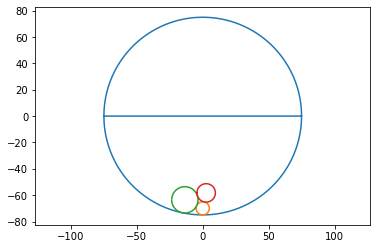

In [88]:
c_1 = Circle(x=0,y=0,rad=75)
plot_duct(c_1)
c_2 = first_cable_position(5, c_1)
c_3 = edge_cable(c_1, c_2, 10)
c_3 = lowest_cable(c_3)
c_4 = inner_cable(c_2,c_3[0],7)
c_4 = cable_filter(out_duct,c_4,[c_1])
c_4 = lowest_cable(c_4)
plot_cable(c_2)
plot_cable(c_3[0])
plot_cable(c_4[0])
test = [c_1]
test.extend(c_3)
print(test)

ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars
ipyk

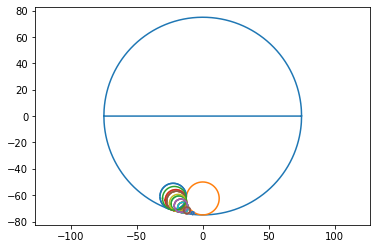

In [84]:
# Cool part way there stage

# List of cable diameters we want to put in the duct
cable_dia = [2,2,2,2,2,5,5,5,5,5,5,5,12,12,10,10,10,8,8,8,8,8,8,20,20,25,15,15,15,15,15,16,16,13,18]
# Convert the diameters to radii
cable_rad = []
for i in cable_dia:
    cable_rad.append(i/2)
# Random shuffle of the cables
random.shuffle(cable_rad)
# Create duct as a circle object
duct = Circle(x=0,y=0,rad=75)
# Take the first cable from the end of the list
def take_cable():
    '''
    Function pops cable off cable_rad and returns popped cable
    '''
    new_cable = cable_rad.pop()
    return new_cable
new_cable = take_cable()
# Place the first cable
first_cable = first_cable_position(r_2 = new_cable, duct = duct)
# Start a list of placed cable circle objects
placed_cables = [first_cable]
while True:
    # Check if you still have cables
    if len(cable_rad) > 0:
        # Take the next cable
        new_cable = take_cable()
    else:
        break
    # Empty list of possible cable objects
    new_cable_obj = []
    # Loop to find all possible cable locations touching the duct
    for i in placed_cables:
        if touch_duct(duct=duct,cable=i,new_cable=new_cable):
            new_cable_obj.extend(edge_cable(duct=duct,cable=i,r_3=new_cable))
    placed_cables.append(new_cable_obj[0])#Delete after testing
    
plot_duct(duct)
for i in placed_cables:
    plot_cable(i)


ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:17: RuntimeWarning: invalid value encountered in double_scalars
ipykernel_launcher:20: RuntimeWarning: invalid value encountered in double_scalars


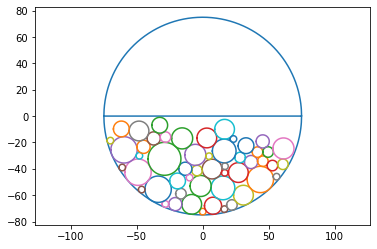

In [100]:
# There's a bug that I haven't been able to track down that means the script only works 
# sometimes. If you re-run it enough times it will work

# List of cable diameters we want to put in the duct
cable_dia = [5,5,5,5,5,5,5,12,12,10,10,10,8,8,8,8,8,8,20,20,25,15,15,15,15,15,16,16,13,18]
cable_dia = cable_dia*2
# Convert the diameters to radii
cable_rad = []
for i in cable_dia:
    cable_rad.append(i/2)
# Random shuffle of the cables
random.shuffle(cable_rad)
# Create duct as a circle object
duct = Circle(x=0,y=0,rad=75)
# Take the first cable from the end of the list
def take_cable():
    '''
    Function pops cable off cable_rad and returns popped cable
    '''
    new_cable = cable_rad.pop()
    return new_cable
new_cable = take_cable()
# Place the first cable
first_cable = first_cable_position(r_2 = new_cable, duct = duct)
# Start a list of placed cable circle objects
placed_cables = [first_cable]
while True:
    # Check if you still have cables
    if len(cable_rad) > 0:
        # Take the next cable
        new_cable = take_cable()
    else:
        break
    # Empty list of possible cable objects
    new_cable_obj = []
    
    # Loop to find all possible cable locations touching the duct
    for i in placed_cables:
        if touch_duct(duct=duct,cable=i,new_cable=new_cable):
            new_cable_obj.extend(edge_cable(duct=duct,cable=i,r_3=new_cable))
    
    # Filter out inadmissible cables
    new_cable_obj = cable_filter(clash,new_cable_obj,placed_cables)
    new_cable_obj = cable_filter(over_half,new_cable_obj,[duct])
    
    # Loop to find all possible cable loations touching 2 placed cables
    if len(placed_cables) > 1: # This is only valid when there are at least two cables
        n = 0 # Start a counter
        for i in placed_cables[:-1]: # Itterate through all but the last placed cables
            for j in placed_cables[n+1::]: # Itterate through the cables after cable i
                if cables_touch(cable_1=i,cable_2=j,new_cable=new_cable):
                    new_cable_obj.extend(inner_cable(cable_1=i,cable_2=j,r_3=new_cable))
            n += 1
    
    # Filter out inadmissible cables
    new_cable_obj = cable_filter(clash,new_cable_obj,placed_cables)
    new_cable_obj = cable_filter(over_half,new_cable_obj,[duct])
    new_cable_obj = cable_filter(out_duct,new_cable_obj,[duct])
    # Select lowest cable
    new_cable_obj = lowest_cable(new_cable_obj)
    
    if new_cable_obj == []:
        break

    placed_cables.extend(new_cable_obj)#Delete after testing
    
plot_duct(duct)
for i in placed_cables:
    plot_cable(i)

plt.savefig('Half_Full.png', dpi = 1000, facecolor = 'white')


In [86]:
a = [1,3,6]
b = [5,3,2]
# Function to return boolean values 
def lessthanten(a,b):
    return a + b < 10
# Practice putting lists in lists using for loops
new_a = []
n = 0
for i in a:
    new_a.append([a[n]])
    n += 1

# Making a new list of lists using the True/False test to 
# compare all the items in the the first list with all
# the items in the second list
boola = []
n = 0
for i in a:
    boola.append([])
    for j in b:
        boola[n].append(lessthanten(i,j))
    n += 1
print(boola)
n = 0

# Use the all() function to select only the lists where
# all the values are True
boolall = []
for i in boola:
    boolall.append(all(boola[n]))
    n += 1
print(boolall)

# Use Numpy trickery to find all the indices of where values
# are True
npbool = np.where(boolall)[0]
npbool = list(npbool)
print(npbool)

# Shorten list a 
onlytrue = []
n = 0
for i in boolall:
    if i == True:
        onlytrue.append(a[n])
    n += 1
print(onlytrue)

[[True, True, True], [True, True, True], [False, True, True]]
[True, True, False]
[0, 1]
[1, 3]


[<__main__.Circle object at 0x7fbf7307a690>, <__main__.Circle object at 0x7fbf7307a4d0>, <__main__.Circle object at 0x7fbf7307ae10>, <__main__.Circle object at 0x7fbf7307a050>]
True


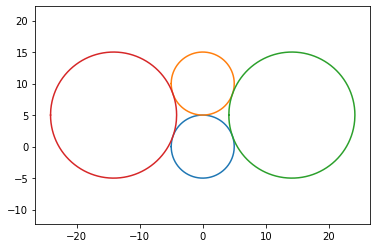

In [90]:
# Testing inner_cable function
c_1 = Circle(0,0,5)
c_2 = Circle(0,10,5)
c_3 = inner_cable(c_1,c_2,10)
PlacedCables = [c_1,c_2]
PlacedCables.extend(c_3)

List_1 = [c_1,c_2]
List_2 = [c_3[0],c_3[1]]
PlacedCables = cable_filter(clash,List_1,List_2)
PlacedCables.extend(c_3)

print(PlacedCables)
print(clash(c_2,c_3[0]))
for i in PlacedCables:
    plot_cable(i)
